In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dropout, Flatten, Dense, Conv2D, MaxPooling2D, Input, Reshape, UpSampling2D, InputLayer, Lambda, ZeroPadding2D, Cropping2D, Conv2DTranspose, BatchNormalization
from tensorflow.keras.utils import to_categorical
# from keras.utils import np_utils
from tensorflow.keras.layers import Conv2D, MaxPool2D, UpSampling2D
from keras.callbacks import EarlyStopping
from keras import backend as K
# from keras import backend as objectives
from tensorflow.keras.losses import mse, binary_crossentropy
import skimage as sk
from skimage.io import imread
import matplotlib.pyplot as plt
import sys
import numpy as np
np.set_printoptions(threshold=sys.maxsize)
from sklearn.model_selection import train_test_split
import zipfile
import os
from pathlib import Path
import cv2 as cv2
from tensorflow.python.framework.ops import disable_eager_execution
# from PIL import ImageFile
# ImageFile.LOAD_TRUNCATED_IMAGES = True


In [2]:
file_path = r"C:\Users\Saaqib\Documents\Imperial\Research Project\SWET_data"
# file_path = r"/rds/general/user/sim21/home/SWET_data"
img_path = []
files = os.listdir(file_path)
for root, directories, files in os.walk(file_path, topdown=False):
	for name in files:
		img_path.append(os.path.join(root, name))

In [3]:
def get_input(path):
    """get specific image from path"""
    img = imread(path)
    return img

def preprocess_input(img):
    # convert between 0 and 1
    return img.astype('float32')

In [4]:
x = []
y = []
for file_path in img_path[0:20]:
    input = get_input(file_path)
    input = cv2.resize(input, (256,256))
    input = sk.color.rgb2gray(input)
    input = preprocess_input(input)
    x.append(input)
    y.append(input)
x = np.array(x)
y = np.array(y)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [7]:
x_train = x_train.reshape(-1,256,256,1)
x_test = x_test.reshape(-1,256,256,1)
y_train = y_train.reshape(-1,256,256,1)
y_test = y_test.reshape(-1,256,256,1)

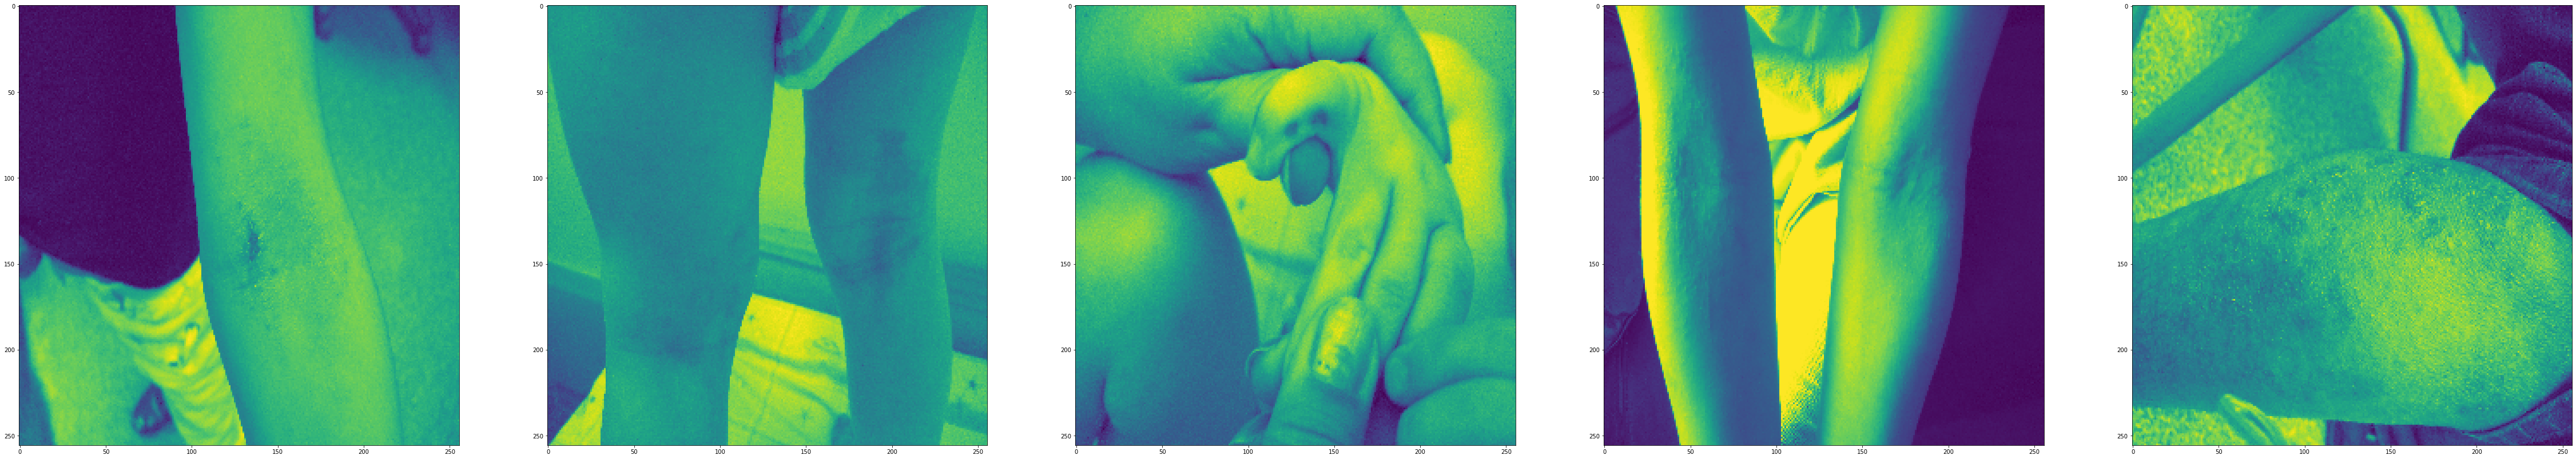

In [8]:
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5,10):
    ax[i-5].imshow(x_train[i, :, :, 0].reshape(256,256))

In [9]:
input_layer = Input(shape=(256,256,1))

x = Conv2D(32,(3,3),activation = 'relu', padding = 'same')(input_layer)    
x = BatchNormalization()(x)
x = MaxPooling2D((2,2), padding ='same')(x)
x = Conv2D(64,(3,3),activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2), padding ='same')(x)
x = Conv2D(128,(3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2), padding ='same')(x)
x = Conv2D(256,(3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
latent_view = MaxPooling2D((2,2), padding ='same')(x)

In [10]:
# decoding architecture

x = Conv2DTranspose(256,(3,3), activation = 'relu', padding = 'same')(latent_view)
x = BatchNormalization()(x)
x = UpSampling2D((2,2))(x)
# x = Cropping2D([[0,1],[0,1]])(x)
x = Conv2DTranspose(128,(3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = UpSampling2D((2,2))(x)
# x = Cropping2D([[0,1],[0,1]])(x)
x = Conv2DTranspose(64,(3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = UpSampling2D((2,2))(x)
x = Conv2DTranspose(32,(3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = UpSampling2D((2,2))(x)
output_layer = Conv2DTranspose(1,(3,3), padding ='same')(x)

In [20]:
model = Model(input_layer, output_layer)
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 32)      320       
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0   

In [21]:
model1 = Model(input_layer, output_layer)
model1.compile(optimizer='adam', loss='binary_crossentropy')
model1.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 32)      320       
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0   

In [22]:
history = model.fit(x_train, y_train,
                epochs=10,
                batch_size=128,
                validation_data=(x_test, y_test)).history

Epoch 1/10
1/1 [==============================] - 14s 14s/step - loss: 2.4416 - val_loss: 0.2765
Epoch 2/10
1/1 [==============================] - 7s 7s/step - loss: 2.1540 - val_loss: 0.2726
Epoch 3/10
1/1 [==============================] - 6s 6s/step - loss: 0.6805 - val_loss: 0.2586
Epoch 4/10
1/1 [==============================] - 5s 5s/step - loss: 0.4247 - val_loss: 0.2480
Epoch 5/10
1/1 [==============================] - 5s 5s/step - loss: 0.3542 - val_loss: 0.2409
Epoch 6/10
1/1 [==============================] - 5s 5s/step - loss: 0.3208 - val_loss: 0.2346
Epoch 7/10
1/1 [==============================] - 5s 5s/step - loss: 0.2958 - val_loss: 0.2252
Epoch 8/10
1/1 [==============================] - 5s 5s/step - loss: 0.2748 - val_loss: 0.2133
Epoch 9/10
1/1 [==============================] - 5s 5s/step - loss: 0.2603 - val_loss: 0.2053
Epoch 10/10
1/1 [==============================] - 5s 5s/step - loss: 0.2500 - val_loss: 0.2030


In [24]:
history1 = model1.fit(x_train, y_train,
                epochs=10,
                batch_size=128,
                validation_data=(x_test, y_test)).history

Epoch 1/10
1/1 [==============================] - 5s 5s/step - loss: 1.2862 - val_loss: 0.6816
Epoch 2/10
1/1 [==============================] - 5s 5s/step - loss: 1.1895 - val_loss: 0.6783
Epoch 3/10
1/1 [==============================] - 5s 5s/step - loss: 1.0986 - val_loss: 0.6798
Epoch 4/10
1/1 [==============================] - 5s 5s/step - loss: 1.0600 - val_loss: 0.6769
Epoch 5/10
1/1 [==============================] - 5s 5s/step - loss: 1.0230 - val_loss: 0.6755
Epoch 6/10
1/1 [==============================] - 5s 5s/step - loss: 0.9544 - val_loss: 0.6768
Epoch 7/10
1/1 [==============================] - 5s 5s/step - loss: 0.9078 - val_loss: 0.6805
Epoch 8/10
1/1 [==============================] - 5s 5s/step - loss: 0.9005 - val_loss: 0.6886
Epoch 9/10
1/1 [==============================] - 5s 5s/step - loss: 0.8853 - val_loss: 0.6922
Epoch 10/10
1/1 [==============================] - 5s 5s/step - loss: 0.8697 - val_loss: 0.7029


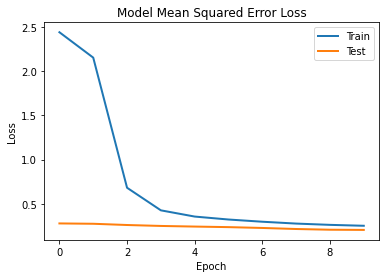

In [25]:
plt.plot(history['loss'], linewidth=2, label='Train')
plt.plot(history['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model Mean Squared Error Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.ylim(ymin=0.70,ymax=1)
plt.show()

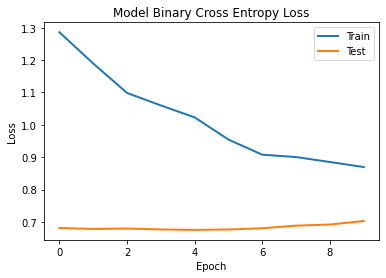

In [26]:
plt.plot(history1['loss'], linewidth=2, label='Train')
plt.plot(history1['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model Binary Cross Entropy Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.ylim(ymin=0.70,ymax=1)
plt.show()

Latent Space

In [27]:
# compile the model
model_latent = Model(input_layer, latent_view)
model_latent.compile(optimizer='adam', loss='mse')
model_latent.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 32)      320       
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0   

In [28]:
# compile the model
model_latent1 = Model(input_layer, latent_view)
model_latent1.compile(optimizer='adam', loss='binary_crossentropy')
model_latent1.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 32)      320       
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0   

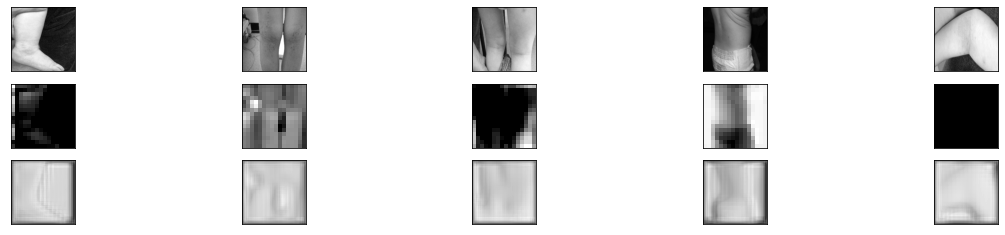

In [29]:
preds = model_latent.predict(y_test)
pred = model.predict(y_test)

plt.figure(figsize=(20, 4))
for i in range(5):
    # Display original
    ax = plt.subplot(3, 5, i + 1)
    plt.imshow(x_test[i].reshape(256,256))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display latent space
    ax = plt.subplot(3,5, i+1+5)
    plt.imshow(preds[i, :, :, i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display reconstruction
    ax = plt.subplot(3, 5, i + 1 + 5+5)
    plt.imshow(pred[i].reshape(256,256))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
# plt.show()
# plt.savefig('my_plot3.png')

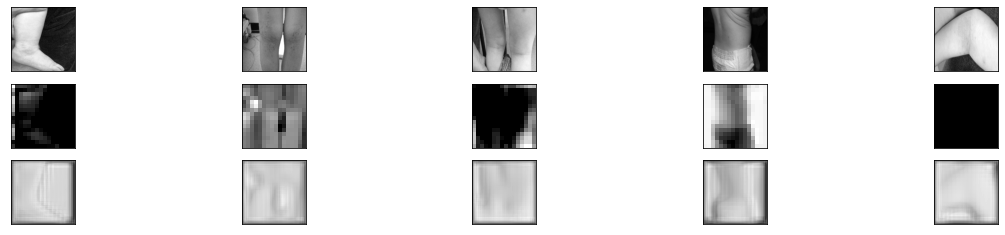

In [31]:
preds1 = model_latent1.predict(y_test)
pred1 = model1.predict(y_test)

plt.figure(figsize=(20, 4))
for i in range(5):
    # Display original
    ax = plt.subplot(3, 5, i + 1)
    plt.imshow(x_test[i].reshape(256,256))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display latent space
    ax = plt.subplot(3,5, i+1+5)
    plt.imshow(preds1[i, :, :, i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display reconstruction
    ax = plt.subplot(3, 5, i + 1 + 5+5)
    plt.imshow(pred1[i].reshape(256,256))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
# plt.show()
# plt.savefig('my_plot3.png')

In [17]:
xtestdata = []
latentspacedata = []
preddata = []
for i in range(5):
    xtestdata.append(x_test[i])
    latentspacedata.append(preds[i, :, :, i])
    preddata.append(pred[i])


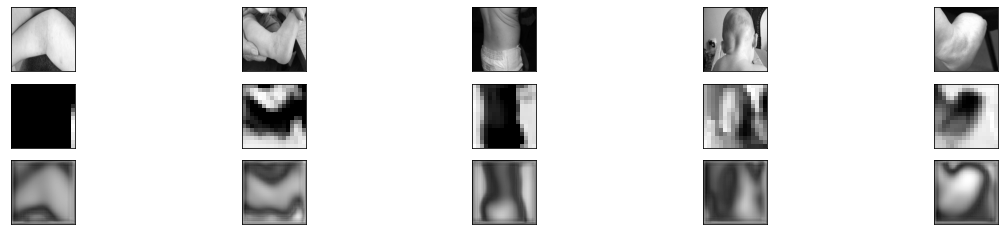

In [28]:
# This is to use the arrays above to plot the reconstructions

plt.figure(figsize=(20, 4))
for i in range(5):
    # Display original
    ax = plt.subplot(3, 5, i + 1)
    plt.imshow(xtestdata[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display latent space
    ax = plt.subplot(3,5, i+1+5)
    plt.imshow(latentspacedata[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display reconstruction
    ax = plt.subplot(3, 5, i + 1 + 5+5)
    plt.imshow(preddata[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
